<font color='seagreen'>

# Week 9 + 10 -- Scattering in Atmospheres

*Please finish and submit this project before the start of class on 8 November 2017.*


<font color='seagreen'> 
### Q1: Landscape Painting with Radiative Transfer

For a scattering atmosphere, we can write the solution to the equation of radiative transfer as
$$ I_\lambda(0, \phi, \theta) = I_\lambda(\tau_\lambda,\phi, \theta) e^{-{\tau_\lambda}} + \int^{\tau_\lambda}_{0} S_\lambda(\tau', \phi, \theta) e^{-\tau'}d\tau'$$
where $I_\lambda(0, \phi, \theta)$ is the intensity I measure coming toward me from a direction parameterized by the angles $\phi$ and $\theta$. The variable $\tau_\lambda$ represents the optical depth to the most distant location we are considering in a given $\phi-\theta$ direction, and $I_\lambda(\tau_\lambda,\phi, \theta)$ is the intensity emerging towards us from that distant location. The source function $S_\lambda(\tau', \phi, \theta)$ respresents the new intensity added into the $\phi-\theta$ direction by each little segment along the line of sight. In class, we introduced a single-scattering albedo $\omega_\lambda$ to represent the fraction scattering contributes to the total extinction coefficient. Throughout this project we'll imagine we're standing on Earth, with $\tau'=0$ corresponding to our location as observers and $\tau'=\tau_\lambda$ corresponding to some distance away from us, perhaps all the way out of the atmosphere entirely.

* Derive an expression $I_\lambda(0, \phi, \theta)$ for a general value of $\omega_\lambda$ using the simplifying approximations of (a) an isothermal atmosphere at temperature $T$ where (b) all scattering is isotropic and (c) a mean intensity field $J_\lambda = \frac{1}{4\pi}\int I_\lambda d\Omega$ that is constant everywhere. This last assumption might be reasonable for parcels of gas illuminated by direct overhead sunlight (where scattering changes the total $J_\lambda$ by only a small fraction). Your expression  should no longer contain an integral, and it may make use of $\tau_\lambda$, $\omega_\lambda$, $J_\lambda$, $B_\lambda(T)$, and $I_\lambda(\tau_\lambda, \phi, \theta)$. 



$$ I_\lambda(0, \phi, \theta) = I_\lambda(\tau_\lambda,\phi, \theta) e^{-{\tau_\lambda}} + \int^{\tau_\lambda}_{0} S_\lambda(\tau', \phi, \theta) e^{-\tau'}d\tau' = I_\lambda(\tau_\lambda,\phi, \theta) e^{-{\tau_\lambda}} + \int^{\tau_\lambda}_{0} \left( (1 - \omega_\lambda)B_\lambda + J_\lambda \omega_\lambda \right)  e^{-\tau'}d\tau' $$
$$ I_\lambda(0, \phi, \theta) = I_\lambda(\tau_\lambda,\phi, \theta) e^{-{\tau_\lambda}} + (1 - e^{-\tau_\lambda}) \left( (1 - \omega_\lambda)B_\lambda + J_\lambda \omega_\lambda \right) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
from spectroscopy import planck_intensity
from astropy import units as u
from astropy import constants as const

* Let's look at the the terms to put into our expression. From here onward, we will applying these expressions to visible-light radiative transfer on Earth. Explain why we can safely ignore the $B_\lambda(T)$ term in the on-an-Earth-orbiting-the-Sun regime.



$\textbf{Answer}:$ The blackbody contribution of the Earth's atmosphere is negligible compared to all the other light from the Sun.

* Next, let's determine the intensity field $I_\lambda(\tau_\lambda, \phi, \theta)$ at our boundary conditions. Define the angle $\alpha$ to an angular distance away from the center of the Sun as seen on the sky. $\alpha=0$ is looking directly at the center of the Sun, $\alpha=\alpha_{\odot}$ is looking at the limb of the Sun, and $\alpha>\alpha_{\odot}$ is looking anywhere on the sky other than directly at the Sun (where neglecting starlight the incoming intensity drops to 0). Plot $I_\lambda(\tau_\lambda, \alpha)$, the specific intensity illuminating the top of the atmosphere, as a function of angular separation $\alpha$ away from the center of the disk of the Sun. For your plot, evaluate the intensity at a wavelength of $\lambda = 0.5~\mu m$ and remember that it should have units of $[W/m^2/\mu m/sr]$. You can assume the Sun is $1~R_\odot$, $1~AU$ away, and emits as Planck spectrum with $T=5780~K$. (In case $\textbf{someone}$ asks, let's ignore limb-darkening on the surface of the Sun.)



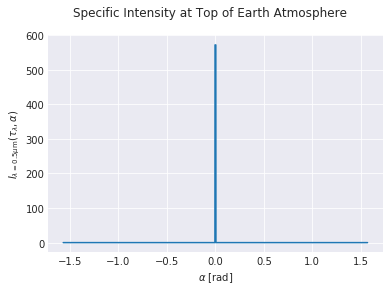

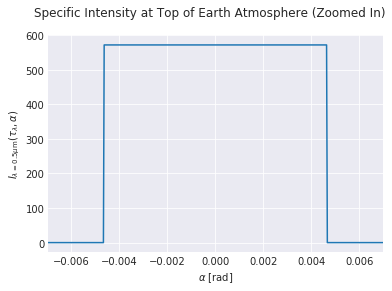

In [2]:
sun_intensity_half_micron = (planck_intensity(0.5*u.micron, 5780.0*u.K))*(((const.R_sun/const.au).decompose())**2.0)
def get_sun_intensity(wavelength, temp):
    return (planck_intensity(wavelength, temp))*(((const.R_sun/const.au).decompose())**2.0)

alpha_sun = u.rad*((const.R_sun/const.au).decompose())
alpha_array = np.linspace(-0.5*np.pi, 0.5*np.pi, 100000)*u.rad
intensity_array = np.zeros(np.shape(alpha_array))
intensity_array[np.where(np.abs(alpha_array) <= alpha_sun)] = sun_intensity_half_micron

plt.plot(alpha_array, intensity_array)
plt.xlabel(r'$\alpha$ [rad]')
plt.ylabel(r'$I_{\lambda = 0.5 \mu \mathrm{m}}(\tau_{\lambda}, \alpha)$')
plt.suptitle(r'Specific Intensity at Top of Earth Atmosphere')
plt.show()
plt.plot(alpha_array, intensity_array)
plt.xlabel(r'$\alpha$ [rad]')
plt.ylabel(r'$I_{\lambda = 0.5 \mu \mathrm{m}}(\tau_{\lambda}, \alpha)$')
plt.suptitle(r'Specific Intensity at Top of Earth Atmosphere (Zoomed In)')
plt.xlim(-1.5*alpha_sun.value, 1.5*alpha_sun.value)
plt.show()

* Calculate the angle-averaged mean intensity $J_\lambda$ that would be associated with this intensity field coming from the Sun, also evaluated at $\lambda = 0.5~\mu m$. This should also have units of $[W/m^2/sr/\mu m]$. 



In [3]:
sun_mean_half_micron = (1.0/(4.0*np.pi*u.sr))*(2.0*np.pi*(1.0 - np.cos(alpha_sun.value))*sun_intensity_half_micron*u.sr)
sun_mean_half_micron = sun_mean_half_micron.to(u.W/(u.micron*(u.m**2.0)*u.sr))

def get_sun_mean_intensity(wavelength, temp):
    sun_intensity = get_sun_intensity(wavelength, temp)
    sun_mean = (1.0/(4.0*np.pi*u.sr))*(2.0*np.pi*(1.0 - np.cos(alpha_sun.value))*sun_intensity*u.sr)
    return sun_mean.to(u.W/(u.micron*(u.m**2.0)*u.sr))

print('Angle-averaged mean intensity is:', sun_mean_half_micron)

Angle-averaged mean intensity is: 0.003089455490554647 W / (m2 micron sr)


* Make a plot with $\tau_\lambda$ on a logarithmic horizontal axis, spanning at least $10^{-2} < \tau_\lambda < 10^2$. On the vertical, plot two curves: one for direct sunlight $I_\lambda(0, \alpha<\alpha_{\odot})$ and one for indirect illumination scattered from the daytime sky $I_\lambda(0, \alpha>\alpha_{\odot})$, again for $\lambda = 0.5~\mu m$. You can think of this plot as indicating the brightness we would see in each direction if we cranked the optical thickness of the atmosphere up or down. Assume the atmosphere is purely scattering at this wavelength $(\omega_{0.5~\mu m} = 1)$. Explain the qualitative behavior of these curves in the extreme optically thick and optically thin limits.



$$ I_\lambda(0, \phi, \theta) \approx I_\lambda(\tau_\lambda,\phi, \theta) e^{-{\tau_\lambda}} + (1 - e^{-\tau_\lambda}) J_\lambda \omega_\lambda $$

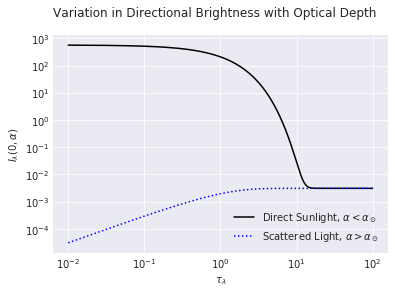

In [4]:
tau_array = np.logspace(-2.0, 2.0, 1000)
scattering_omega_half_micron = 1.0
intensity_array_scatter = (1.0 - np.exp(-tau_array))*sun_mean_half_micron*scattering_omega_half_micron
intensity_array_direct = (sun_intensity_half_micron*np.exp(-tau_array)) + intensity_array_scatter

def get_intensity_scatter(tau, mean_intensity=sun_mean_half_micron, scattering_omega=1.0):
    return (1.0 - np.exp(-tau))*mean_intensity*scattering_omega

plt.loglog(tau_array, intensity_array_direct, '-k', label=r'Direct Sunlight, $\alpha < \alpha_\odot$')
plt.loglog(tau_array, intensity_array_scatter, ':b', label=r'Scattered Light, $\alpha > \alpha_\odot$')
plt.xlabel(r'$\tau_\lambda$')
plt.ylabel(r'$I_\lambda (0, \alpha)$')
plt.suptitle('Variation in Directional Brightness with Optical Depth')
plt.legend()
plt.show()

* The scattering cross section for Rayleigh scattering for Earth air is approximately
$$\sigma_\lambda = 3.7 \times 10^{-32} \times \left(\frac{1~\mu m}{\lambda} \right)^4~m^2$$
for a single molecule and for light with wavlength $\lambda$. Using this cross-section, plot the optical depth $\tau_\lambda$ vs distance $s$ for a wavelength of $\lambda = 0.5~\mu m$. For simplicity, you can take the number density of air molecules $n$ to be a constant value appropriate for a temperature of $273~K$ and Boulder's surface pressure of $P = 0.8~bar$. Again, assume $\omega_\lambda = 1$.



2.122482940410446e+25 1 / m3
5.92e-31 m2


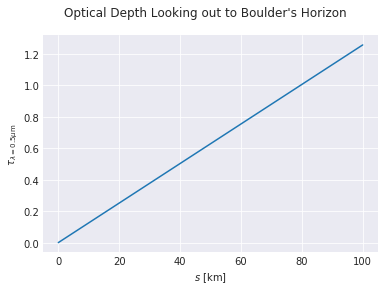

In [5]:
pressure = 0.8*u.bar
temp = 273.0*u.K
number_density = (pressure/(const.k_B*temp)).decompose()
print(number_density)
scattering_cross_section = (3.7e-32)*((((1.0*u.micron)/(0.5*u.micron)))**4.0)*(u.m**2.0)
print(scattering_cross_section)
distance_array = np.linspace(0.0, 100.0, 1000)*u.km
optical_depth = (scattering_cross_section*number_density*distance_array).decompose()
plt.plot(distance_array, optical_depth)
plt.xlabel(r'$s$ [km]')
plt.ylabel(r'$\tau_{\lambda=0.5\mu\mathrm{m}}$')
plt.suptitle('Optical Depth Looking out to Boulder\'s Horizon')
plt.show()

def calc_tau(distance, scattering_coeff=3.7e-32, wavelength=0.5*u.micron, number_density=number_density):
    scattering_cross_section = (scattering_coeff)*((((1.0*u.micron)/(wavelength)))**4.0)*(u.m**2.0)
    return (scattering_cross_section*number_density*distance).decompose()

* If you go up to the top of the JILA tower and look out, you'll see to a different distance $s$ for each different direction you look in $\phi$ (azimuth) and $\theta$ (zenith angle). The file `distances.npy` contains a 2D array of these distances computed over a grid of $\phi$ (columns) and $\theta$ (rows). Using this array, make an image of the intensity $I_\lambda(0, \phi, \theta)$ we would observe from JILA for pure Rayleigh scattering off air molecules, evaluated at $\lambda = 0.5~\mu m$. For simplicity, you can assume $I_\lambda(\tau_\lambda, \phi, \theta) = 0$ everywhere: this amounts to saying that the ground has a low albedo and that there's no intensity coming towards us from directly behind the atmosphere. Make a second image where you increase the scattering cross section by a factor of $10\times$, for example if there were some very small aerosol particulates in the air.



In [6]:
def zachs_imshow_v2(array, title, color_title, x_arr, y_arr, x_label, y_label,
                    origin_label='lower', figsize=(10,4), aspect_type=None, interpolation_type='nearest',
                   cmap_name='viridis'):
    '''
    This function is a help to demonstrate how
    imshow-ing arrays works in matplotlib.
    '''
    
    # create a new figure
    plt.figure(figsize=figsize)
    
    # make an image, with brightness representing array values
    plt.imshow(array, 
               cmap=cmap_name, # Choose the color map.
               origin=origin_label, # Set (x,y) = (0,0) to be the lower left.
               extent=[np.min(x_arr), # Extent sets the coordinates for the corners
                       np.max(x_arr), #  of the array you're plotting
                       np.min(y_arr), #  [left, right, bottom, top]
                       np.max(y_arr)],
               aspect=aspect_type, # How is the aspect ratio of the plot set?
               interpolation=interpolation_type) # How are points visually interpolated?
    
    # add a colorbar indicating the scale of the colors
    plt.colorbar(label=color_title)

    # normal stuff
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.suptitle(title)

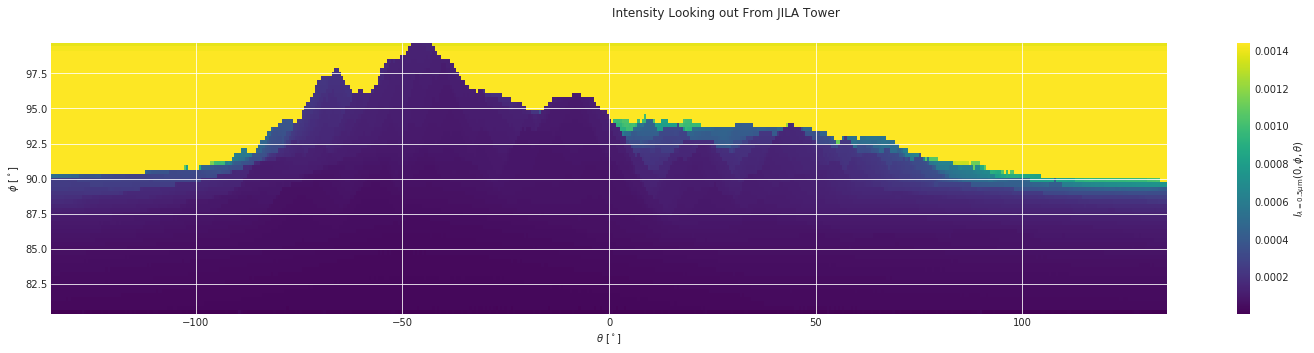

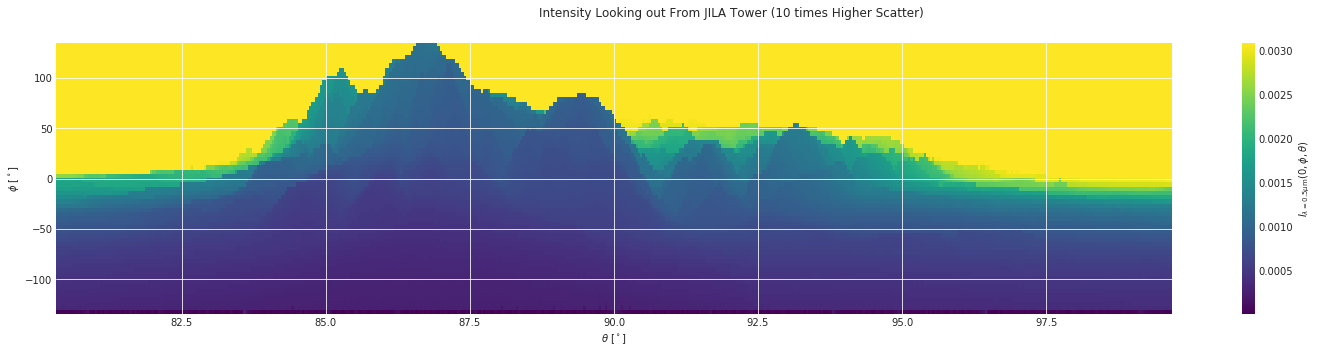

In [7]:
phi, theta, distance = np.load('distances.npy')
distance_tau = calc_tau(distance*u.km)
distance_tau_ten = calc_tau(distance*u.km, scattering_coeff=3.7e-31)
distance_intensity = get_intensity_scatter(distance_tau)
distance_intensity_ten = get_intensity_scatter(distance_tau_ten)
color_title = r'$I_{\lambda=0.5\mu\mathrm{m}}(0, \phi, \theta)$'
tot_title = 'Intensity Looking out From JILA Tower'
tot_title_2 = tot_title + ' (10 times Higher Scatter)'
zachs_imshow_v2(distance_intensity.value, title=tot_title, color_title=color_title,
                x_arr=phi, y_arr=theta, x_label=r'$\theta$ [$^\circ$]', y_label=r'$\phi$ [$^\circ$]', figsize=(25, 5),
               aspect_type='auto', cmap_name='viridis')
plt.show()

zachs_imshow_v2(distance_intensity_ten.value, title=tot_title_2, color_title=color_title,
                x_arr=theta, y_arr=phi, x_label=r'$\theta$ [$^\circ$]', y_label=r'$\phi$ [$^\circ$]', figsize=(25, 5),
               aspect_type='auto')
plt.show()




* Now, imagine there's a snow storm in Boulder. Imagine there is so much snow in the air that we can't even see the Flatirons from the top of the JILA tower. If a typical snowflake is $1~mm$ in radius, roughly what minimum number density of snowflakes would be required in the atmosphere to achieve such white-out conditions? Make one or more images to demonstrate your point.

Distance to Flatirons $\sim 10$ km, opaque at $\tau_\lambda \approx 10$. At $\lambda = 0.5 \mu$m, we can assume we are in the geometrically scattered regime:

$$\sigma_\lambda = \pi r^2; \tau_\lambda = s \times \sigma_\lambda \times n$$


$$\implies n = \frac{\tau_\lambda}{s \times \sigma_\lambda} = \frac{\tau_\lambda}{s \times \pi r^2} = \frac{10}{10000 \textrm{ m} \times \pi \times 0.001^2 \textrm{ m}^2}  = \frac{1000}{\pi} \textrm{ m}^{-3}$$

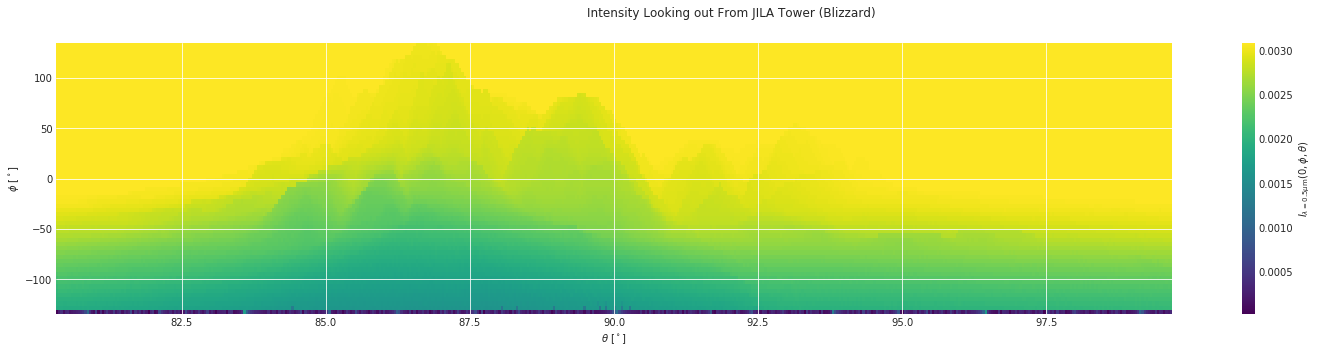

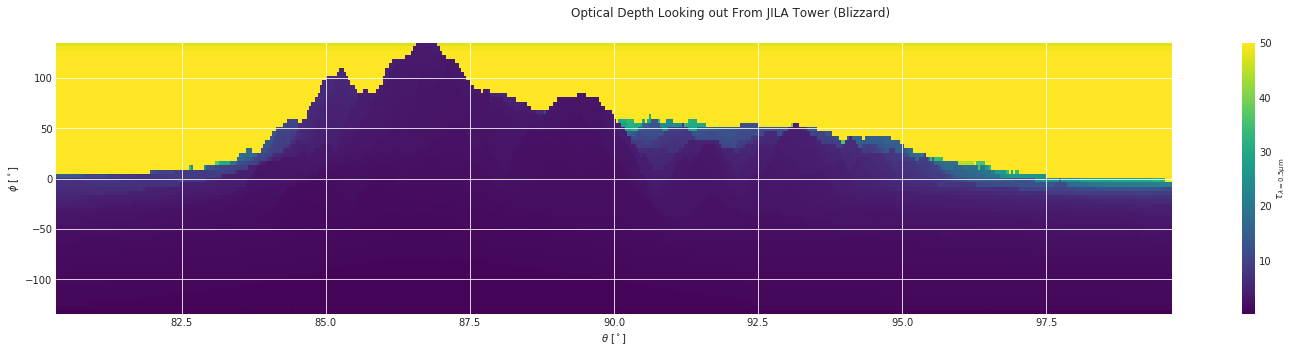

In [8]:
def geometric_scatter(radius):
    return (np.pi*(radius**2.0)).to(u.m**2.0)

def get_snow_tau(distance, radius_snow=1.0*u.mm, number_density=1000.0/(np.pi*u.m**3.0)):
    return (geometric_scatter(radius_snow)*number_density*distance).decompose()

distance_snow = get_snow_tau(distance*u.km)
distance_intensity_snow = get_intensity_scatter(distance_snow)
tot_title_snow = tot_title + ' (Blizzard)'
zachs_imshow_v2(distance_intensity_snow.value, title=tot_title_snow, color_title=color_title,
                x_arr=theta, y_arr=phi, x_label=r'$\theta$ [$^\circ$]', y_label=r'$\phi$ [$^\circ$]', figsize=(25, 5),
               aspect_type='auto')
plt.show()

tau_title_snow = 'Optical Depth Looking out From JILA Tower (Blizzard)'
color_title_snow = r'$\tau_{\lambda=0.5\mu\mathrm{m}}$'
zachs_imshow_v2(distance_snow.value, title=tau_title_snow, color_title=color_title_snow,
                x_arr=theta, y_arr=phi, x_label=r'$\theta$ [$^\circ$]', y_label=r'$\phi$ [$^\circ$]', figsize=(25, 5),
               aspect_type='auto')
plt.show()

Looking at the intensity plot, the mountains are still kind of visible, although they would be very difficult to tell apart from the sky. Higher optical depths would get closer to sky, and $\tau_\lambda$ depends linearly on $n$, so you could tune that to whatever returns sufficiently sky-like conditions.

<font color='seagreen'>

### Q2: Randall Munroe is a punk.
Answer [this question](https://xkcd.com/1145/) to your own satisfaction.

Violet mean intensity is: 0.0021633271694300876 W / (m2 micron sr)
Blue mean intensity is: 0.003089455490554647 W / (m2 micron sr)


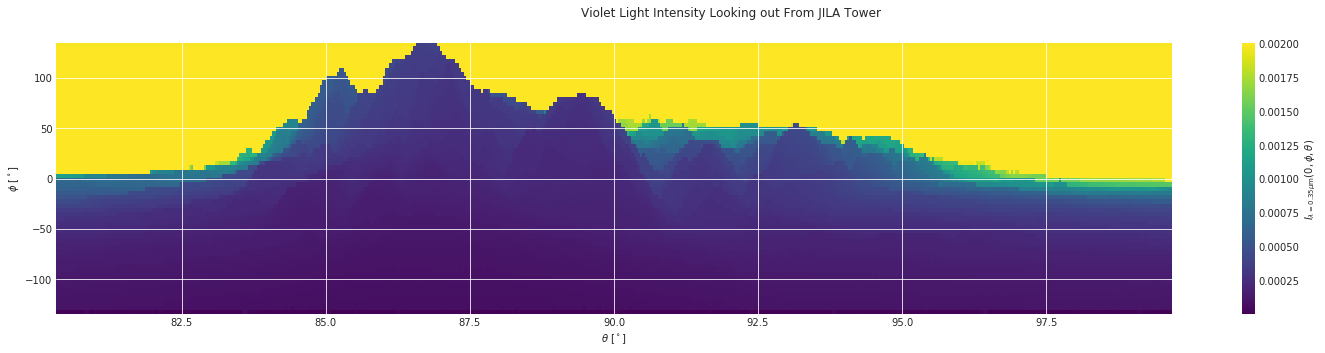

In [10]:
violet_tau = calc_tau(distance*u.km, wavelength=0.35*u.micron)
violet_mean = get_sun_mean_intensity(0.35*u.micron, 5780.0*u.K)
print('Violet mean intensity is:', violet_mean)
print('Blue mean intensity is:', sun_mean_half_micron)
violet_intensity = get_intensity_scatter(violet_tau, mean_intensity=violet_mean)
color_title_violet = r'$I_{\lambda=0.35\mu\mathrm{m}}(0, \phi, \theta)$'
tot_title_violet = 'Violet Light Intensity Looking out From JILA Tower'
zachs_imshow_v2(violet_intensity.value, title=tot_title_violet, color_title=color_title_violet,
                x_arr=theta, y_arr=phi, x_label=r'$\theta$ [$^\circ$]', y_label=r'$\phi$ [$^\circ$]', figsize=(25, 5),
               aspect_type='auto')
plt.show()

A combination of the Sun emitting less violet light and our eyes being less responsive to violet light lead to the sky appearing blue. These are probably loosely evolutionarily related, but that is very unscientific guesswork. Other animals have very different visual response functions, so the Sun's blackbody spectrum is not the whole story.

Note that the intensity of the sky here is about two-thirds of the blue sky, and that the eye's response function is roughly logarithmic.